In [ ]:
mbti_df=pd.read_csv('/content/mbti_1.csv')

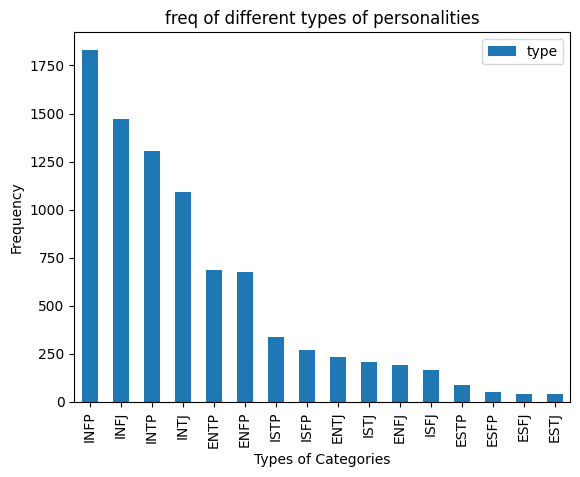

In [ ]:
pd.DataFrame(mbti_df.type.value_counts()).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Types of Categories')
plt.title('freq of different types of personalities')
plt.show()

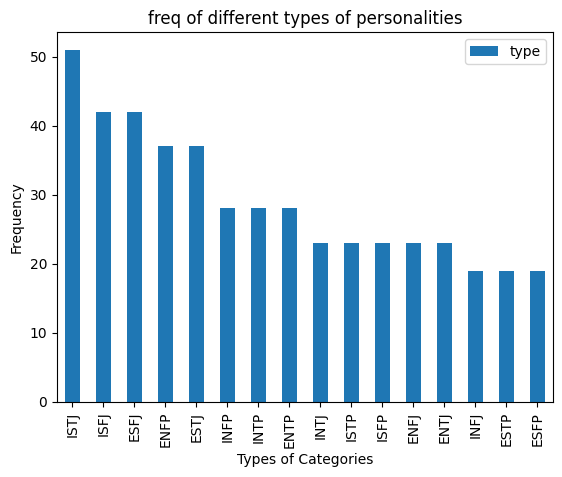

In [ ]:
mbti_df=pd.read_csv('/content/mbti_clean.csv')
pd.DataFrame(mbti_df.type.value_counts()).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Types of Categories')
plt.title('freq of different types of personalities')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

mbti_df = pd.read_csv("/content/mbti_1.csv")

type_counts = mbti_df['type'].value_counts()


target_count = type_counts.min()

balanced_data = []


for mbti_type in type_counts.index:
    type_subset = mbti_df[mbti_df['type'] == mbti_type]

    # downsampling
    if len(type_subset) > target_count:
        sampled_subset = type_subset.sample(n=target_count, random_state=42)
    else:
        sampled_subset = type_subset

    # Add the balanced subset to the list
    balanced_data.append(sampled_subset)

balanced_df = pd.concat(balanced_data)

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_df.to_csv("mbti_clean1.csv", index=False)


In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('/content/mbti_clean.csv')

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

def tokenize_and_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]  # Remove stopwords and lemmatize
    return ' '.join(tokens)

data['clean_text'] = data['posts'].apply(preprocess_text)
data['clean_text'] = data['clean_text'].apply(tokenize_and_lemmatize)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['clean_text'])
y = data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Overall Accuracy:", accuracy)


Overall Accuracy: 0.8946236559139785


In [94]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('/content/mbti_clean.csv')

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

def tokenize_and_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

data['clean_text'] = data['posts'].apply(preprocess_text)
data['clean_text'] = data['clean_text'].apply(tokenize_and_lemmatize)


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['clean_text'])
y = data['type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)


try:
    with open("/content/toral.txt", "r", encoding="utf-8") as file:
        new_post = file.read()
except FileNotFoundError:
    print("Error: Text file not found. Please check the file path.")
    exit(1)

def clean_text(text):
  """
  This function cleans the text by removing special characters, converting to lowercase,
  and removing stopwords.
  """
  text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
  text = text.lower()  # Convert to lowercase
  stop_words = stopwords.words("english")  # Load stopwords
  text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
  return text

new_post_clean = clean_text(new_post)
new_post_vectorized = tfidf_vectorizer.transform([new_post_clean])

# Predict the MBTI type
predicted_mbti_type = model.predict(new_post_vectorized)[0]
print("Predicted MBTI Personality Type:", predicted_mbti_type)



Predicted MBTI Personality Type: ISTP


In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('/content/train_dataset.csv')

data = data.drop('Gender', axis=1)

X = data.iloc[:, 1:-1]  # Features (personality scores)
y = data['Personality (Class label)']  # Target (personality traits)

model = RandomForestClassifier()
model.fit(X, y)

def predict_personality():
    print("Please enter the scores for the Big 5 personalities (out of 7):")
    openness = int(input("Openness: "))
    neuroticism = int(input("Neuroticism: "))
    conscientiousness = int(input("Conscientiousness: "))
    agreeableness = int(input("Agreeableness: "))
    extraversion = int(input("Extraversion: "))

    scores = [[openness, neuroticism, conscientiousness, agreeableness, extraversion]]
    personality_trait = model.predict(scores)[0]

    print(f"The predicted Behavioral trait based on the provided scores is: {personality_trait}")

predict_personality()



Please enter the scores for the Big 5 personalities (out of 7):
Openness: 7
Neuroticism: 5
Conscientiousness: 2
Agreeableness: 5
Extraversion: 6
The predicted Behavioral trait based on the provided scores is: dependable


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### **Rough**

In [ ]:
import numpy as np

def combine_mbti_and_big5(mbti_personality, big5_scores):
    matrix = {
        'E': {'Extraversion': -0.74, 'Openness': 0.03, 'Agreeableness': -0.03, 'Conscientiousness': 0.08, 'Neuroticism': 0.16},
        'I': {'Extraversion': 0.74, 'Openness': -0.03, 'Agreeableness': 0.03, 'Conscientiousness': -0.08, 'Neuroticism': -0.16},
        'S': {'Extraversion': 0.10, 'Openness': 0.72, 'Agreeableness': 0.04, 'Conscientiousness': -0.15, 'Neuroticism': -0.06},
        'N': {'Extraversion': -0.10, 'Openness': -0.72, 'Agreeableness': -0.04, 'Conscientiousness': 0.15, 'Neuroticism': 0.06},
        'T': {'Extraversion': 0.19, 'Openness': 0.02, 'Agreeableness': 0.44, 'Conscientiousness': -0.15, 'Neuroticism': 0.06},
        'F': {'Extraversion': -0.19, 'Openness': -0.02, 'Agreeableness': -0.44, 'Conscientiousness': 0.15, 'Neuroticism': -0.06},
        'J': {'Extraversion': 0.15, 'Openness': 0.30, 'Agreeableness': -0.06, 'Conscientiousness': -0.49, 'Neuroticism': 0.11},
        'P': {'Extraversion': -0.15, 'Openness': -0.30, 'Agreeableness': 0.06, 'Conscientiousness': 0.49, 'Neuroticism': -0.11}
    }

    mbti_first_letter = mbti_personality[0]

    # Extract Big 5 scores based on MBTI personality type
    extracted_scores = [matrix[mbti_first_letter][trait] * score for trait, score in zip(['Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Neuroticism'], big5_scores)]

    # Aggregate the extracted scores
    combined_scores = np.mean(extracted_scores)

    # Determine the MBTI type based on combined scores
    if combined_scores >= 0:
        ei = 'E'
    else:
        ei = 'I'

    if combined_scores >= 0:
        sn = 'S'
    else:
        sn = 'N'

    if combined_scores >= 0:
        tf = 'T'
    else:
        tf = 'F'

    if combined_scores >= 0:
        jp = 'J'
    else:
        jp = 'P'

    combined_mbti = ei + sn + tf + jp  # Combined MBTI personality type

    return combined_mbti

# Example usage:
mbti_personality = 'INFP'  # Example MBTI personality type
big5_scores = [7, 4, 3, 6, 3]  # Example Big 5 scores out of 7
combined_personality = combine_mbti_and_big5(mbti_personality, big5_scores)
print("Combined Personality in MBTI Format:", combined_personality)


Combined Personality in MBTI Format: ESTJ


In [ ]:
import numpy as np

def combine_mbti_and_big5(mbti_personality, big5_scores):
    matrix = {
        'E': {'Extraversion': -0.74, 'Openness': 0.03, 'Agreeableness': -0.03, 'Conscientiousness': 0.08, 'Neuroticism': 0.16},
        'I': {'Extraversion': 0.74, 'Openness': -0.03, 'Agreeableness': 0.03, 'Conscientiousness': -0.08, 'Neuroticism': -0.16},
        'S': {'Extraversion': 0.10, 'Openness': 0.72, 'Agreeableness': 0.04, 'Conscientiousness': -0.15, 'Neuroticism': -0.06},
        'N': {'Extraversion': -0.10, 'Openness': -0.72, 'Agreeableness': -0.04, 'Conscientiousness': 0.15, 'Neuroticism': 0.06},
        'T': {'Extraversion': 0.19, 'Openness': 0.02, 'Agreeableness': 0.44, 'Conscientiousness': -0.15, 'Neuroticism': 0.06},
        'F': {'Extraversion': -0.19, 'Openness': -0.02, 'Agreeableness': -0.44, 'Conscientiousness': 0.15, 'Neuroticism': -0.06},
        'J': {'Extraversion': 0.15, 'Openness': 0.30, 'Agreeableness': -0.06, 'Conscientiousness': -0.49, 'Neuroticism': 0.11},
        'P': {'Extraversion': -0.15, 'Openness': -0.30, 'Agreeableness': 0.06, 'Conscientiousness': 0.49, 'Neuroticism': -0.11}
    }

    mbti_first_letter = mbti_personality[0]

    # Extract Big 5 scores based on MBTI personality type
    extracted_scores = [matrix[mbti_first_letter][trait] * score for trait, score in zip(['Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Neuroticism'], big5_scores)]

    # Weighted sum of the extracted scores
    combined_scores = np.sum(extracted_scores)

    # Determine the MBTI type based on combined scores
    ei = 'E' if combined_scores > 0 else 'I'

    combined_mbti = ei + mbti_personality[1:]  # Combined MBTI personality type

    return combined_mbti

# Example usage:
mbti_personality = 'ENFP'  # Example MBTI personality type
big5_scores = [2, 5, 3, 6, 3]  # Example Big 5 scores out of 7
combined_personality = combine_mbti_and_big5(mbti_personality, big5_scores)
print("Combined Personality in MBTI Format:", combined_personality)




Combined Personality in MBTI Format: INFP


In [ ]:
def combine_mbti_and_big5(big5_scores):
    extraversion_level = 'E' if big5_scores[0] >= 5 else ('X' if big5_scores[0] == 4 else 'I')
    openness_level = 'N' if big5_scores[1] >= 5 else ('X' if big5_scores[1] == 4 else 'S')
    conscientiousness_level = 'J' if big5_scores[2] >= 5 else 'P'
    agreeableness_level = 'F' if big5_scores[3] >= 5 else 'T'
    neuroticism_level = 'P' if big5_scores[4] >= 5 else ('X' if big5_scores[4] == 4 else 'J')

    combined_mbti = extraversion_level + openness_level + conscientiousness_level + agreeableness_level + neuroticism_level
    return combined_mbti

# Example usage:
big5_scores = [7, 5, 3, 6, 6]  # Example Big 5 scores out of 7 for ENFP
combined_personality = combine_mbti_and_big5(big5_scores)
print("Combined Personality in MBTI Format:", combined_personality)



Combined Personality in MBTI Format: ENPFP


In [ ]:
def mbti_to_big5(mbti_personality):
    # Mapping of MBTI traits to Big Five traits
    mbti_to_big5_mapping = {
        'E': [7, 5, 3, 6, 6],  # ENFP
        'I': [7, 5, 3, 6, 6],  # INFP
        'S': [4, 5, 4, 6, 6],  # ESTP (Example, you need to fill this based on your analysis)
        # Fill in the rest based on your analysis
    }

    # Retrieve Big Five scores for the given MBTI personality
    big5_scores = mbti_to_big5_mapping.get(mbti_personality[0], [0, 0, 0, 0, 0])

    return big5_scores

def combine_mbti_and_big5(input_mbti_personality, input_big5_scores):
    # Get Big Five scores from the input MBTI personality
    input_mbti_big5_scores = mbti_to_big5(input_mbti_personality)

    # Combine the input and provided Big Five scores
    combined_big5_scores = [(input + provided) / 2 for input, provided in zip(input_big5_scores, input_mbti_big5_scores)]

    # Determine the combined MBTI personality based on the combined Big Five scores
    combined_personality = ''

    # Determine the MBTI type based on combined scores
    combined_personality += 'E' if combined_big5_scores[0] > 4 else 'I'
    combined_personality += 'S' if combined_big5_scores[1] > 4 else 'N'
    combined_personality += 'T' if combined_big5_scores[2] > 4 else 'F'
    combined_personality += 'J' if combined_big5_scores[3] > 4 else 'P'

    return combined_personality

# Example usage:
input_mbti_personality = 'ENFP'  # Example input MBTI personality type
input_big5_scores = [7, 2, 3, 6, 6]  # Example input Big 5 scores out of 7
combined_personality = combine_mbti_and_big5(input_mbti_personality, input_big5_scores)
print("Combined Personality in MBTI Format:", combined_personality)


Combined Personality in MBTI Format: ENFJ


In [ ]:
import os
import collections
import pandas as pd
import csv


DATA_DIR = "data"
MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "mbti_1.csv")
MBTI_CLEAN_CSV_PATH = os.path.join(DATA_DIR, "mbti_clean.csv")
MBTI_UNCLEAN_CSV_PATH = os.path.join(DATA_DIR, "mbti_unclean.csv")
MBTI_TO_FREQUENCY_DICT = {
    "ISTJ": 0.11,
    "ISFJ": 0.09,
    "INFJ": 0.04,
    "INTJ": 0.05,
    "ISTP": 0.05,
    "ISFP": 0.05,
    "INFP": 0.06,
    "INTP": 0.06,
    "ESTP": 0.04,
    "ESFP": 0.04,
    "ENFP": 0.08,
    "ENTP": 0.06,
    "ESTJ": 0.08,
    "ESFJ": 0.09,
    "ENFJ": 0.05,
    "ENTJ": 0.05,
}


df = pd.read_csv(MBTI_RAW_CSV_PATH)

counts = collections.defaultdict(int)
for mbti in df["type"]:
    counts[mbti] += 1

limiting_type = None
min_size = float("infinity")
for mbti in counts.keys():
    size = counts[mbti] / MBTI_TO_FREQUENCY_DICT[mbti]
    if size < min_size:
        min_size = size
        limiting_type = mbti

dic = collections.defaultdict(list)
for index, row in df.iterrows():
    dic[row["type"]].append(row)

unclean_list = []
with open(MBTI_CLEAN_CSV_PATH, "w") as f:
    writer = csv.writer(f)
    writer.writerow(["type", "posts"])

    for mbti in MBTI_TO_FREQUENCY_DICT.keys():
        list1 = dic[mbti]
        for x in range(0, int(round(min_size * MBTI_TO_FREQUENCY_DICT[mbti]))):
            writer.writerow(list1[x])
        unclean_list.append(
            list1[int(round(min_size * MBTI_TO_FREQUENCY_DICT[mbti])) : len(list1)]
        )

with open(MBTI_UNCLEAN_CSV_PATH, "w") as f:
    writer = csv.writer(f)
    writer.writerow(["type", "posts"])
    for mbti in unclean_list:
        for x in mbti:
            writer.writerow(x)

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
mbti_df["posts"] = mbti_df["posts"].str.lower()

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

remove_words = stopwords.words("english")
for i in range(mbti_df.shape[0]):
  post_temp=mbti_df._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])    #to remove stopwords
  mbti_df._set_value(i, 'posts', post_temp)

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
for i in range(mbti_df.shape[0]):
  post_temp=mbti_df._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])   #to implement lemmetization i.e. to group together different forms of a word
  mbti_df._set_value(i, 'posts', post_temp)

In [ ]:
print(mbti_df)

      type                                              posts
0     INFJ   enfp intj moment sportscenter top ten play pr...
1     ENTP   finding lack post alarming sex boring positio...
2     INTP   good one course say know blessing curse doe a...
3     INTJ   dear intp enjoyed conversation day esoteric g...
4     ENTJ   fired another silly misconception approaching...
...    ...                                                ...
8670  ISFP   ixfp always think cat fi doms reason especial...
8671  ENFP   thread already exists someplace else doe post...
8672  INTP   many question thing would take purple pill pi...
8673  INFP   conflicted right come wanting child honestly ...
8674  INFP   ha long since personalitycafe although seem c...

[8675 rows x 2 columns]
